In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#Aggregate the Saber Sim predicitions
FileNames=glob.glob('./SaberSimProjections/*')

In [3]:
DFList=[]
for name in FileNames:
    DFList.append(pd.read_csv(name))
SeasonResults = pd.concat(DFList)

In [4]:
SeasonResults.head()

,mlb_id,Name,Team,Opponent,Position,Batting Order,Projection,Actual,Price,Value,...,wOBA,ISO,IP,Wins,QS,K,CG,CGSO,ERA,FIP
0,641771,Chad Kuhl,pit,sdn,P,NaN,17.2462,6.42,8200,2.103195,...,NaN,NaN,6.12543,0.3953,0.5081,6.0898,0.0234,0.0177,3.996454,3.860608
1,641778,Eric Lauer,sdn,pit,P,NaN,13.2127,2.05,4800,2.752646,...,NaN,NaN,5.74623,0.3143,0.4074,5.1006,0.0217,0.0135,4.769997,4.740612
2,570256,Gregory Polanco,pit,sdn,OF,2.0,8.1277,7.00,4500,1.806156,...,0.317838,0.163765,0.00000,0.0000,0.0000,0.8901,0.0000,0.0000,NaN,NaN
3,572816,Corey Dickerson,pit,sdn,OF,5.0,8.4083,9.00,4100,2.050805,...,0.351805,0.192948,0.00000,0.0000,0.0000,0.7610,0.0000,0.0000,NaN,NaN
4,605137,Josh Bell,pit,sdn,1B,4.0,8.5283,10.00,4000,2.132075,...,0.360148,0.197627,0.00000,0.0000,0.0000,0.7443,0.0000,0.0000,NaN,NaN


In [5]:
#Get the BatterList
BatterList = pd.read_csv('./DataBaseCrawler/MLBBatterRoster2018.csv')
PitcherList = pd.read_csv('./DataBaseCrawler/MLBPitcherRoster2018.csv')

In [6]:
#Quick Test
Player1 = SeasonResults
Player1 = Player1[['Name','Team','Position','Projection','Actual']]
Player1 = Player1[Player1['Name']=='Mike Trout']
Player1 = Player1[Player1['Projection']>0]

(array([13., 22., 11.,  9., 15.,  6.,  2.,  3.,  1.,  1.]),
 array([-12.195  ,  -8.06074,  -3.92648,   0.20778,   4.34204,   8.4763 ,
         12.61056,  16.74482,  20.87908,  25.01334,  29.1476 ]),
 <a list of 10 Patch objects>)

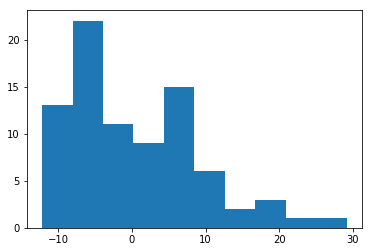

In [7]:
#Error = MikeTrout['Actual'].values-MikeTrout['Projection'].values
Error1=Player1['Actual'].values-Player1['Projection'].values
Error1 = Error1[~np.isnan(Error1)]
plt.hist(Error1)

In [8]:
sum(Error1**2)/len(Error1)

80.54515519578315

In [9]:
np.mean(Player1['Actual'])

11.337349397590362